<a href="https://colab.research.google.com/github/11shrushti/AI_ML_Internship_Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1: Can Artificial Intelligence (AI) play games?

**Answer:**

Yes, Artificial Intelligence (AI) can play games, including HTML5 games. AI can use machine learning algorithms, particularly reinforcement learning, to learn how to play games by interacting with the game environment. One approach involves using computer vision to interpret the game's state from its graphical output and make decisions based on this information.

**Concepts of Computer Vision and Tools:**

1. **Computer Vision**: We can use computer vision to capture the game's screen and interpret the visual elements, such as the position of characters, obstacles, scores, etc.
2. **Reinforcement Learning (RL)**: An RL agent can be trained to play the game by rewarding it for actions that lead to higher scores and penalizing it for actions that lead to game over.
3. **Tools**:
   - **OpenCV**: For capturing and processing game frames.
   - **Stable-Baselines3**: A popular RL library in Python.
   - **Gym**: A toolkit for developing and comparing RL algorithms.

In [2]:
!pip install stable_baselines3


  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0a2
    Uninstalling gymnasium-1.0.0a2:
      Successfully uninstalled gymnasium-1.0.0a2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
shimmy 2.0.0 requires gymnasium>=1.0.0a1, but you have gymnasium 0.29.1 which is incompatible.


In [1]:
!pip install shimmy

In [14]:
import gym
import numpy as np
import cv2
from stable_baselines3 import PPO
from gym import spaces
from google.colab.patches import cv2_imshow


In [22]:
class CustomGameEnv(gym.Env):
    def __init__(self):
        super(CustomGameEnv, self).__init__()
        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(low=0, high=255, shape=(84, 84, 3), dtype=np.uint8)
        self.state = None
        self.done = False

    def reset(self):

        self.state = np.zeros((84, 84, 3), dtype=np.uint8)
        self.done = False
        return self.state

    def step(self, action):

        reward = 0
        if action == 0:
            #  move left
            reward = 1
        elif action == 1:
            # move right
            reward = 1

        # Update the state (this is just an example; actual implementation will depend on the game)
        self.state = np.random.randint(0, 255, (84, 84, 3), dtype=np.uint8)


        if np.random.rand() > 0.95:
            self.done = True
            reward = 10

        return self.state, reward, self.done, {}

    def render(self, mode='human'):
        # Render the game screen
        if mode == 'human':
            cv2_imshow(self.state)  # Use cv2_imshow instead of cv2.imshow
            # cv2.waitKey(1)  # These are not needed with cv2_imshow
            # cv2.destroyAllWindows()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.7     |
|    ep_rew_mean     | 28.7     |
| time/              |          |
|    fps             | 286      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.7        |
|    ep_rew_mean          | 33.7        |
| time/                   |             |
|    fps                  | 102         |
|    iterations           | 2           |
|    time_elapsed         | 40          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009248348 |
|    clip_fraction        | 0.0861      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.0217     |
|    learning_rate        | 0.

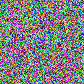

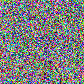

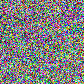

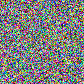

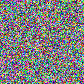

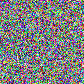

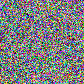

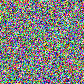

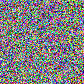

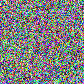

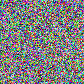

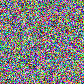

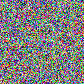

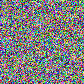

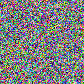

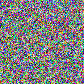

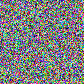

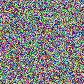

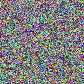

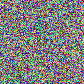

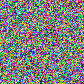

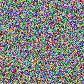

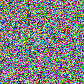

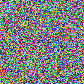

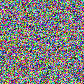

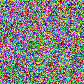

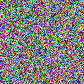

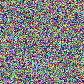

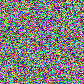

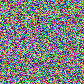

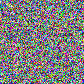

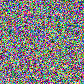

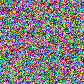

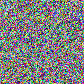

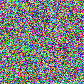

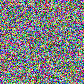

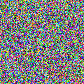

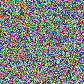

In [23]:
env = CustomGameEnv()


model = PPO('CnnPolicy', env, verbose=1)
model.learn(total_timesteps=10000)


obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break
env.close()

## Q2: Is AI animation possible?

### Answer:

Yes, AI animation is possible. AI and ML tools can be used to create and enhance animations, including generating realistic videos.

### Explanation:

- **Generative Adversarial Networks (GANs)**: A class of ML frameworks where two neural networks compete to generate realistic images or videos.
- **Deep Learning Frameworks**: Libraries like TensorFlow and PyTorch that provide tools to develop and train neural networks.

### Tools Used:

- **DeepArt**: An AI tool that creates artwork and animations based on neural style transfer.
- **DALL-E**: An AI model developed by OpenAI to generate images from textual descriptions.
